In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('simce.csv', encoding='latin-1')  #data set del simce
df2 = pd.read_csv('promedio.csv', encoding='latin-1') #data set del promedio

In [6]:
df.tail(5)

,agno,region,provincia,comuna,lenguaje,matematicas
6502,2024,ñuble,diguillín,san ignacio,270.0,261.0
6503,2024,ñuble,diguillín,yungay,267.0,251.0
6504,2024,ñuble,itata,quirihue,284.0,266.0
6505,2024,ñuble,itata,cobquecura,255.0,263.0
6506,2024,ñuble,itata,coelemu,279.0,268.0


In [7]:
#descripcion de filas y columnas que tiene el data set del simce
filas, columnas = df.shape
print(f"El archivo tiene {filas} filas y {columnas} columnas.")

El archivo tiene 6507 filas y 6 columnas.


In [8]:
#descripcion de filas y columnas que tiene el data set del pomedio
filas, columnas = df2.shape
print(f"El archivo tiene {filas} filas y {columnas} columnas.")

El archivo tiene 19 filas y 3 columnas.


In [9]:
#nombra y indica el tipo de datos de las columnas del data set del simce
print(df.dtypes)

agno             int64
region          object
provincia       object
comuna          object
lenguaje       float64
matematicas    float64
dtype: object


In [10]:
#nombra y indica el tipo de datos de las columnas del data set del promedio
print(df2.dtypes)

agno             int64
lenguaje       float64
matematicas    float64
dtype: object


In [11]:
#Indica el % de completitud del data set del simce
completitud = 100 * df.notnull().mean()
print(completitud)

agno           100.0
region         100.0
provincia      100.0
comuna         100.0
lenguaje       100.0
matematicas    100.0
dtype: float64


In [12]:
#Indica el % de completitud del data set del promedio
completitud2 = 100 * df2.notnull().mean()
print(completitud)

agno           100.0
region         100.0
provincia      100.0
comuna         100.0
lenguaje       100.0
matematicas    100.0
dtype: float64


In [15]:
# Lista de regiones de interés
regiones_interes = [
    "atacama",
    "coquimbo",
    "libertador general bernardo o'higgins",
    "biobío",
    "los ríos",
    "metropolitana"
]

In [17]:
#Normalizar los nombres de región para evitar problemas con mayúsculas o espacios
df['region_normalizada'] = df['region'].str.lower().str.strip()

In [19]:
#Filtrar el DataFrame por las regiones de interés
simce_filtrado = df[df['region_normalizada'].isin(regiones_interes)]

In [24]:
# Mostrar las primeras filas del DataFrame filtrado
print(simce_filtrado.head(5))

   agno         region  provincia           comuna  lenguaje  matematicas  \
2  1999  metropolitana  melipilla            alhué     240.0        248.0   
3  1999        atacama     huasco  alto del carmen     252.0        267.0   
5  1999       coquimbo      elqui        andacollo     247.0        241.0   
8  1999         biobío     biobío           antuco     226.0        218.0   
9  1999         biobío     arauco           arauco     238.0        239.0   

  region_normalizada  
2      metropolitana  
3            atacama  
5           coquimbo  
8             biobío  
9             biobío  


In [27]:
# Calcular promedios por región
promedios = simce_filtrado.groupby('region_normalizada')[['lenguaje', 'matematicas']].mean().sort_values(by='matematicas', ascending=False)

In [35]:
# Mostrar las primeras filas del DataFrame filtrado
print(promedios.head(5))

                                         lenguaje  matematicas
region_normalizada                                            
metropolitana                          262.394737   254.682186
libertador general bernardo o'higgins  258.279107   249.196172
biobío                                 257.314499   247.253731
los ríos                               259.866667   244.233333
coquimbo                               256.477193   243.985965


<Figure size 1500x1000 with 0 Axes>

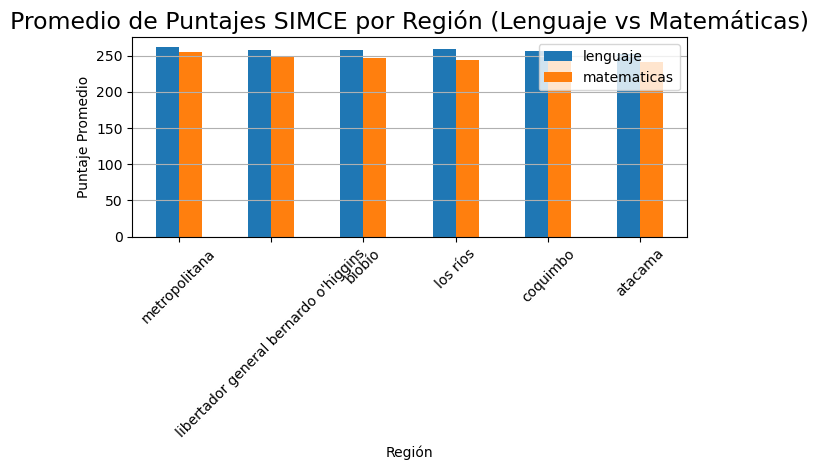

In [34]:
# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
promedios.plot(kind='bar')
plt.title('Promedio de Puntajes SIMCE por Región (Lenguaje vs Matemáticas)', fontsize=17)
plt.ylabel('Puntaje Promedio')
plt.xlabel('Región')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [37]:
# Agrupar por región y año, y calcular promedios
promedios_anuales = simce_filtrado.groupby(['region_normalizada', 'agno'])[['lenguaje', 'matematicas']].mean().reset_index()

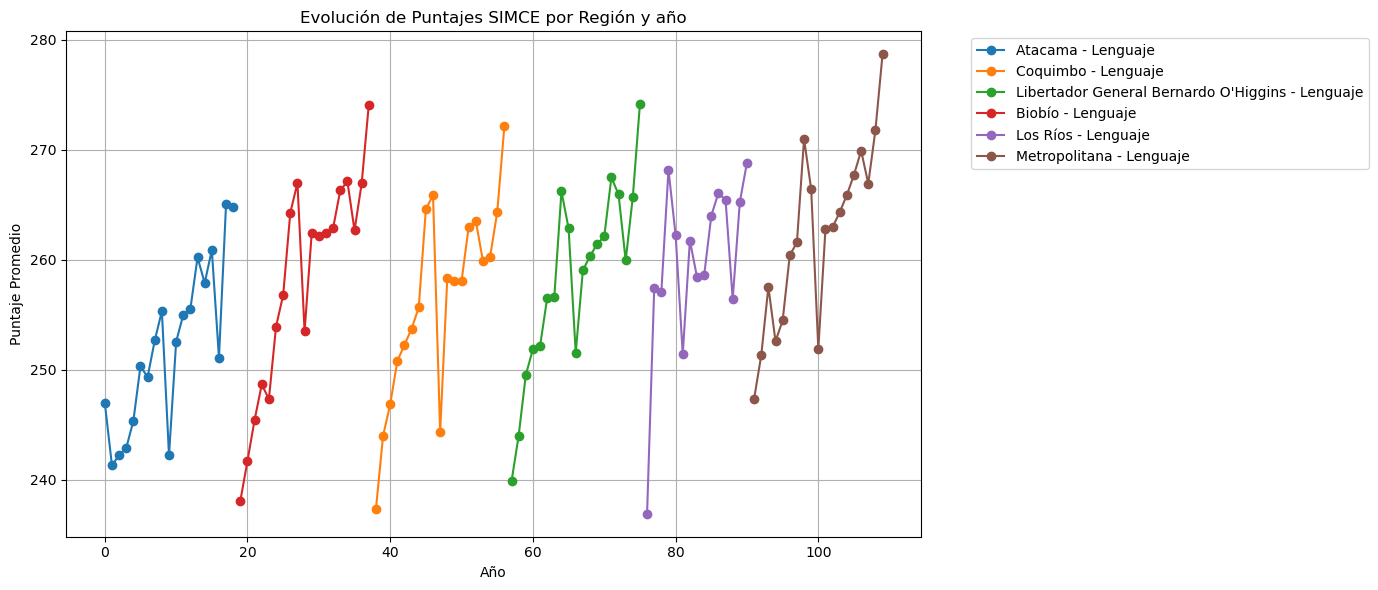

In [45]:
# Crear gráfico de líneas: evolución por región
plt.figure(figsize=(14, 6))

for region in regiones_interes:
    region_data = promedios_anuales[promedios_anuales['region_normalizada'] == region]
    plt.plot(region_data['lenguaje'], marker='o', label=f'{region.title()} - Lenguaje')
    
plt.title('Evolución de Puntajes SIMCE por Región y año')
plt.xlabel('Año')
plt.ylabel('Puntaje Promedio')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

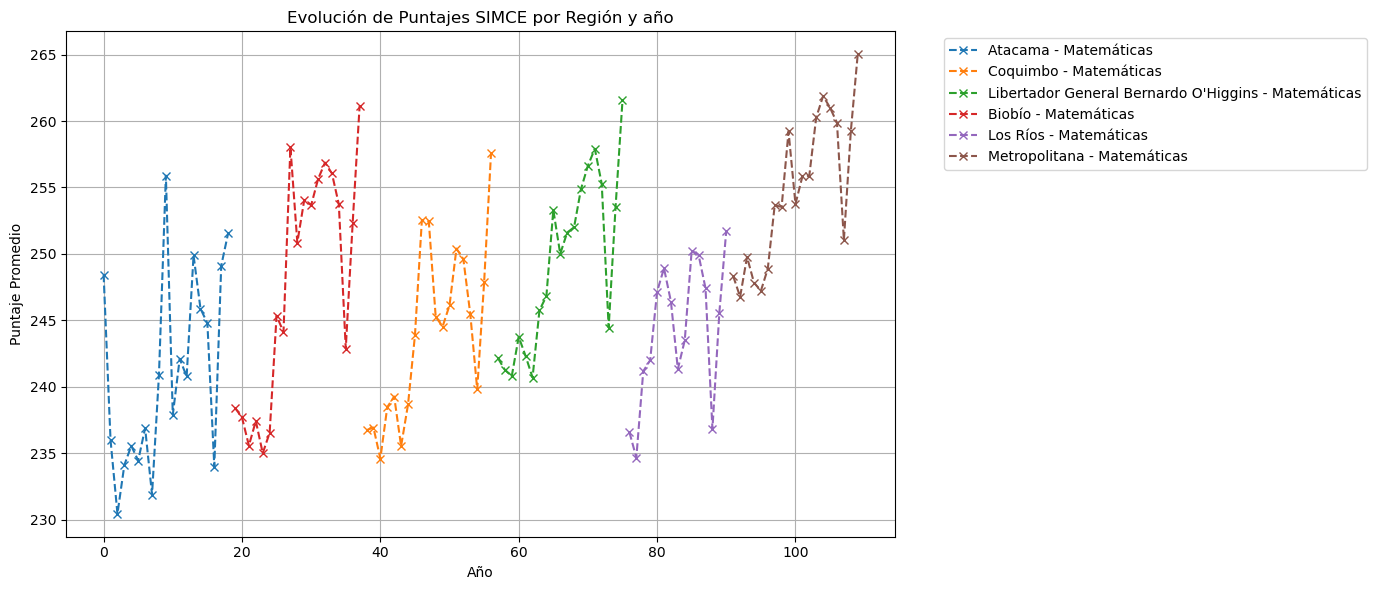

In [46]:
# Crear gráfico de líneas: evolución por región
plt.figure(figsize=(14, 6))

for region in regiones_interes:
    region_data = promedios_anuales[promedios_anuales['region_normalizada'] == region]
    
    plt.plot(region_data['matematicas'], marker='x', linestyle='--', label=f'{region.title()} - Matemáticas')

plt.title('Evolución de Puntajes SIMCE por Región y año')
plt.xlabel('Año')
plt.ylabel('Puntaje Promedio')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()